<a href="https://colab.research.google.com/github/zdanielshi/data_science_LFZ/blob/main/DS_0611_Logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import RobustScaler, StandardScaler, StandardScaler, PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [98]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [99]:
stroke = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Colab data/healthcare-dataset-stroke-data.csv')

In [100]:
stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [101]:
stroke.drop(columns=['id'], inplace=True)

# Analysis

In [102]:
stroke.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


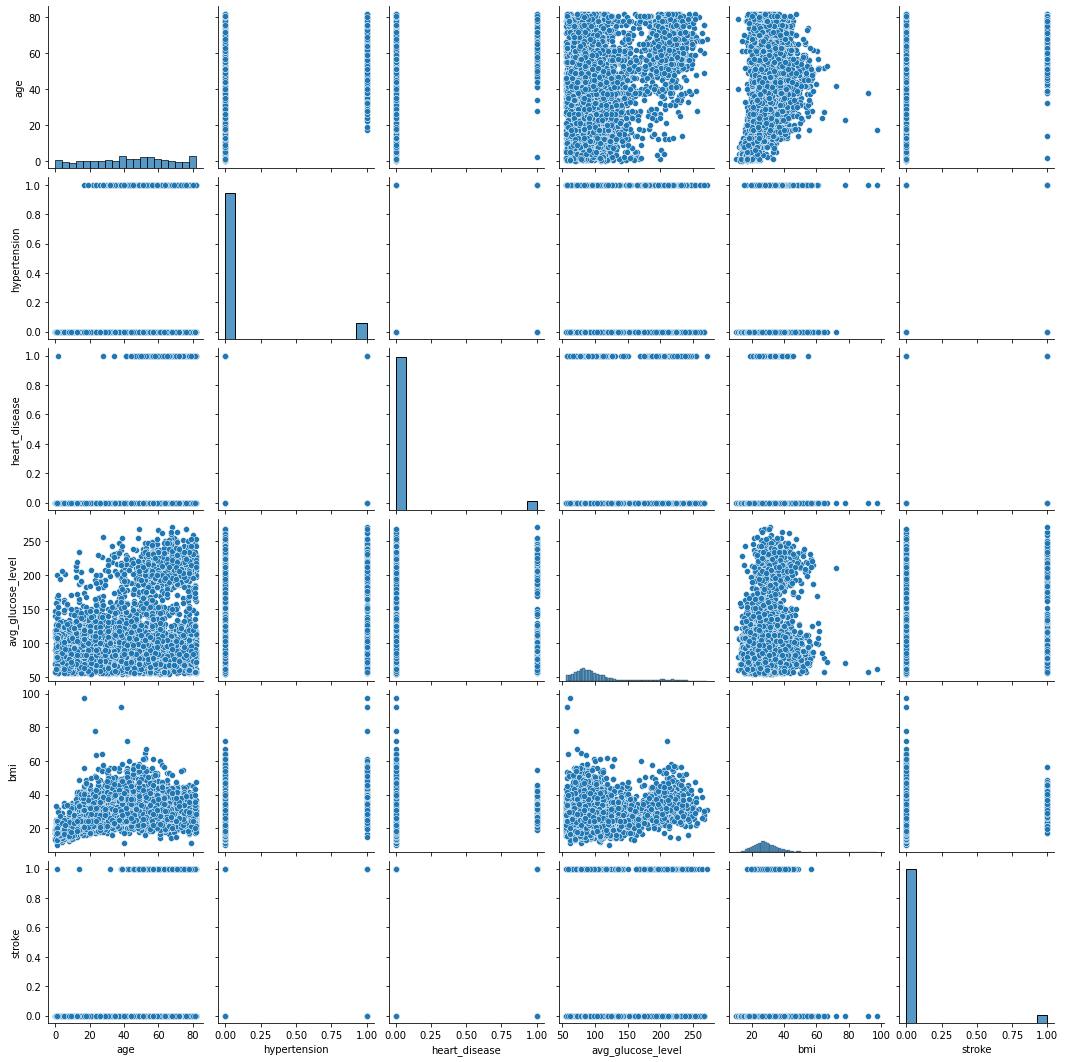

In [103]:
sns.pairplot(stroke)

# Clean up

## Fill nulls

In [104]:
stroke.corr().bmi.sort_values(ascending=False)

bmi                  1.000000
age                  0.333398
avg_glucose_level    0.175502
hypertension         0.167811
stroke               0.042374
heart_disease        0.041357
Name: bmi, dtype: float64

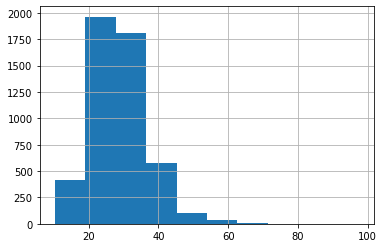

In [105]:
stroke.bmi.hist()

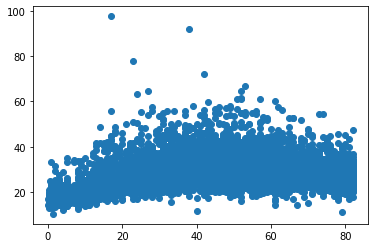

In [106]:
plt.scatter(stroke.age, stroke.bmi)

In [107]:
stroke.bmi.isnull().sum() / stroke.bmi.count()

0.040945202688938684

In [108]:
stroke.bmi.median()

28.1

In [109]:
stroke.bmi.fillna(stroke.bmi.median(), inplace=True)

In [110]:
stroke.isnull().sum().sum()

0

# Preprocessing

## Checking datatypes

In [111]:
stroke.gender.value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [112]:
stroke.ever_married.value_counts()

Yes    3353
No     1757
Name: ever_married, dtype: int64

In [113]:
stroke['ever_married'] = stroke['ever_married'].apply(lambda x: 1 if x == 'Yes' else 0)

In [114]:
stroke.ever_married.value_counts()

1    3353
0    1757
Name: ever_married, dtype: int64

In [115]:
stroke.work_type.value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [116]:
stroke.Residence_type.value_counts()

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

In [117]:
stroke.smoking_status.value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

## Transforming

In [118]:
stroke.skew()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


age                 -0.137059
hypertension         2.715392
heart_disease        3.947244
ever_married        -0.657745
avg_glucose_level    1.572284
bmi                  1.088187
stroke               4.193284
dtype: float64

In [127]:
np.log(stroke.avg_glucose_level).skew()

0.8827511014266456

In [134]:
pd.DataFrame(list(stats.boxcox(stroke.avg_glucose_level)[0])).skew()

0    0.083299
dtype: float64

In [136]:
stroke.avg_glucose_level = list(stats.boxcox(stroke.avg_glucose_level)[0])

In [143]:
stroke.bmi = np.log(stroke.bmi)

# Dropping columns

## Scaling

In [145]:
bool_list = [] # initiate a list
for (xcolname, xcol) in stroke.iteritems(): # iterate through columns that
  bool_test = xcol.value_counts().index.tolist() # find the number of unique values per column
  if 1 and 0 in bool_test and len(bool_test) == 2: # if there are only 2 unique values, add them to the list
    bool_list.append(xcolname)

print(bool_list)# print the list

['hypertension', 'heart_disease', 'ever_married', 'stroke']


In [147]:
for i in bool_list:
  stroke[i] = stroke[i].astype('bool')

In [148]:
stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   bool   
 3   heart_disease      5110 non-null   bool   
 4   ever_married       5110 non-null   bool   
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   bool   
dtypes: bool(4), float64(3), object(4)
memory usage: 299.5+ KB


In [149]:
num_cols_to_scale = stroke.select_dtypes(exclude = ['object', 'bool']).columns.values.tolist()
num_cols_to_scale

['age', 'avg_glucose_level', 'bmi']

### Robust Scaler

In [150]:
robust_scaler = RobustScaler().fit(stroke[num_cols_to_scale])
stroke[num_cols_to_scale] = robust_scaler.transform(stroke[num_cols_to_scale])

### Standard Scaler

In [ ]:
# standard_scaler = StandardScaler().fit(stroke[num_cols_to_scale])
# stroke[num_cols_to_scale] = standard_scaler.transform(stroke[num_cols_to_scale])

## Encoding

In [151]:
stroke = pd.get_dummies(stroke)

# Training and predicting

## Splitting training and test data

In [173]:
xtrain, xtest, ytrain, ytest = train_test_split(stroke.loc[:,stroke.columns != 'stroke'], stroke.stroke, test_size = .3, random_state = 7)

## Logistic Regression

In [184]:
logreg = LogisticRegression().fit(xtrain, ytrain)

In [185]:
log_predict = logreg.predict(xtest)

### Analyzing Logistic

In [224]:
logreg_score = logreg.score(xtest, ytest)
logreg_score

0.9471624266144814

## KNN Classifer

In [244]:
n = 7
knn = KNeighborsClassifier(n_neighbors=n).fit(xtrain, ytrain)

In [245]:
knn_predict = knn.predict(xtest)

### Analyzing KNN Classifier results

In [246]:
knn_score = knn.score(xtest, ytest)
knn_score

0.9471624266144814

# Summary Results

In [247]:
print('{:.5f}'.format(logreg_score), '- Logistic Regression Score')
print('{:.5f}'.format(knn_score), '- KNN Regression Score with', n, 'neighbors')

0.94716 - Logistic Regression Score
0.94716 - KNN Regression Score with 7 neighbors
